# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* The output "`!! Agent state not been updated!`" is indicative that the smartcab is not moving at all.
* Since the agent is not moving, the reward really depends on what the current environment is:
    * If the current environment requires the smartcab to be stationary, (for example if there is a red light), then the agent receives a positive reward for idling. This is just pure luck.
    * However, when the light turns green and the smartcab doesn't move, it now gets a negative reward. I noticed that the reward changes with time (-5.18 vs - 4.75)

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*agent.py*<br>
1. `verbose` - This flag controls how much output the simulation provides. Sometimes we need to review all output, but sometimes we only need a couple of key pieces of information. This flag can help us control that.
2. `learning` - This can be used to force the agent to use Q-Learning.
3. `enforce_deadline` - This controls whether or not the smarcab is required to reach its destination within a certain timeframe

*environment.py*<br>
` def act(self, agent, action):` is the function called when an agent performs an action

*simulator.py*<br>
`render()` renders the GUI simulation, while `render_text()` renders the simulated trial data in a terminal.

*planner.py*<br>
`next_waypoint()` considers East-West direction first.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


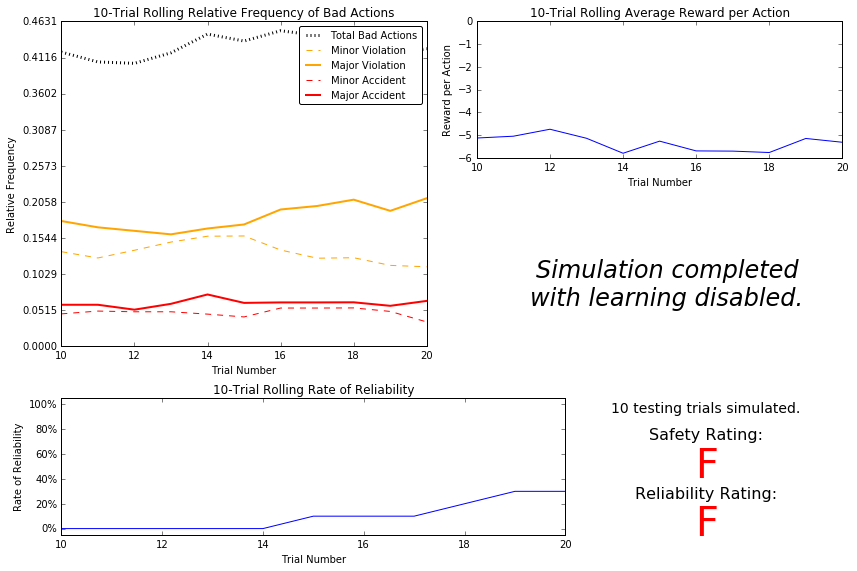

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* The agent is making bad decisions about 50% of the time. About 6% of the time, bad decisions are leading to accidents.
* Yes the reliability makes sense, because the agent is not making decisions based on the current environnment. Such an agent would not be considered reliable. 
* The agent is receiving negative rewards. Although at some steps, the agent is observed to be receiving positive rewards for performing correct actions (arguably by pure chance), overall it receives larger, and more frequent negative rewards. Yes, the large negative rewards show the agent being penalized heavily.
* There doesn't appear to be any "significant" change as the number of trials increase. There is an upward trend in reliability, but that could just be the noise in the process (i.e. one of the random states actually being the right action to take, out of sheer luck)
* This smartcab would be absolutely unreliable and unsafe for its passengers
    * First, the smartcab has really no sense of going towards the destination. It will just keep making random moves.
    * Secondly, the smartcab is not taking into account any traffic rules, hence it is extremely unsafe for its own passengers, as well as for other vehicles around it.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

I think the features waypoint, light, left, and oncoming are the most relevant. Waypoint is important for efficiency as it informs the smartcab what the next step is for the destination. The features light, left, and oncoming are important for the safety of the smartcab and its passengers.

1. `waypoint` - This feature determines the direction in which the smartcab should take the next step. It is a feature relating to efficiency. It helps the agent reach the destination in time. This feature will help us distinguish between acceptable actions and the optimal action for a given state. For example, if a light is green and there is no oncoming traffic, then going forward, left, or right would all be equally valid. However, if we know that the destination is on the right, then going right is the optimal decision for that state. This knowledge is provided by the `waypoint` feature.

2. `inputs[light]` - This feature informs the agent whether the traffic light at the intersection is green or red. It is a feature relating to safety. The agent needs this information because if it unknowingly traverses the intersection when the light is red, it could lead to a collision, or at the least, a violation. On the other hand, idling when the light is green is unsafe and annoying for the vehicles behind, and also makes the smartcab less efficient.

3. `inputs[left]` - This feature informs the agent whether there is any traffic on the left of the smartcab, and if so, which direction are they traveling in. This is a feature relating to safety. In particular, this knowledge is needed when a left turn needs to be made. If there is no traffic on the left, the smartcab can safely make a turn. If the vehicle on the left is going forward, then a left turn may lead to a collision.

4. `inputs[oncoming]` - This information is needed to determine what actions are valid for the smartcab at a given intersection. It is a feature relating to safety. If there is no oncoming traffic, then forward, left and right are all valid. But if the oncoming traffic is turning left, then going forward is not safe anymore. In the same way, if the oncoming traffic is moving forward, then left turn is not safe and should be penalized as it could lead to a collision. 

I'd argue that right and deadline are not as important at this stage as we focus on safety and efficiency. During training the agent would learn whether it succeeded in reaching its destination or not, so adding a deadline feature would increase the training burden. In a real environment, I think right would be a relevant feature to include, however, it appears that right is not being used to inform the agent in any way, so we can leave it out for now.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

|  Feature |       Possible States      | Number of States |
|:--------:|:--------------------------:|:----------------:|
| waypoint |    forward, left, right    |         3        |
|   light  |         red, green         |         2        |
|   left   | None, forward, left, right |         4        |
| oncoming | None, forward, left, right |         4        |


The size of the state space would be $3 * 2 * 4 * 4 = 96$

Considering that safety and reliability is at stake, I would consider 96 to not be very large, and I feel that the agent could learn a policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

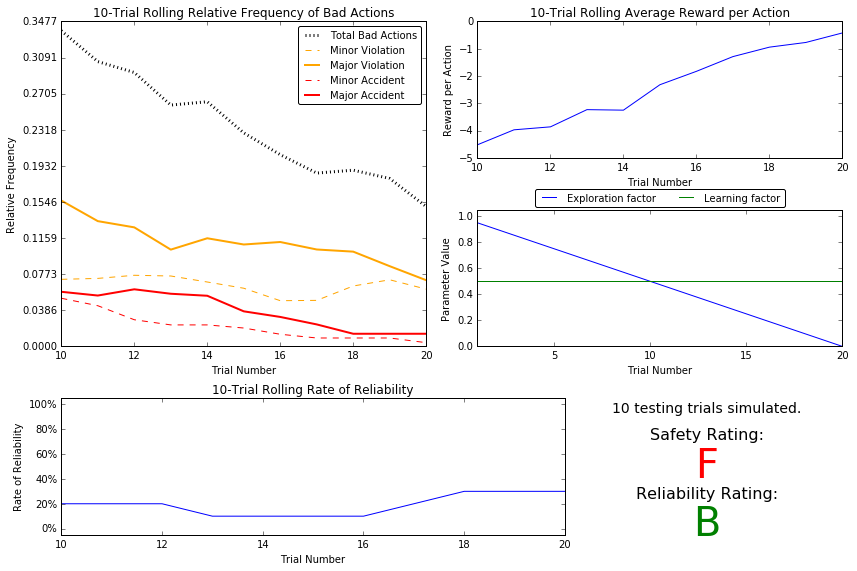

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
* Yes, we got an F for safety with both the basic agent and the default Q-learning agent. On the graph, the final rate of reliability wasn't really that much different compared to the basic agent.
* About 20 training trials were needed before testing. Yes, since epsilon started at 1, and was decremented by 0.05 at every step, epsilon would fall by 0.1 every two steps. Hence, after twenty trials, epsilon would have dropped below the default epsilon tolerance of 0.05.
* Yes it is a linear function, starts at 1 and drops to 0 in about 20 steps.
* Yes, the number of bad actions decreased and the average reward increased as number of trials was increased, but not enough to get excellent ratings on the testing trials.
* Safety is still an F :(    
* But reliability went up from an F to a B.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

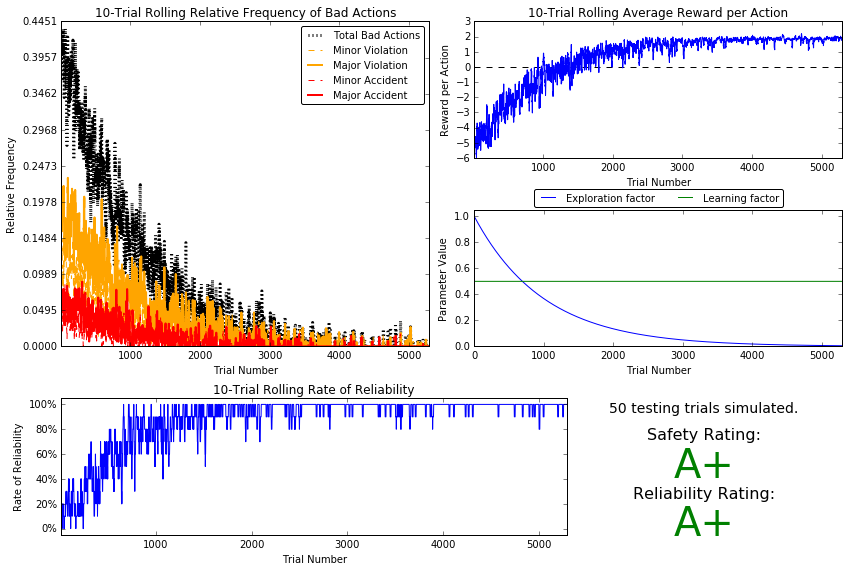

In [20]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
* The decaying function used was  $ \epsilon = a^t $.
* About 5,000 trials were needed before testing. Although, this seems like a large number, with a smartcab, it is important to have the highest level of safety and reliability, so it was worth the extra time needed to get an A+ on both safety as well as reliability.
* I tried a few different values, and eventually found that an epsilon-tolerance of 0.005 worked well. With alpha, I got similar results with a range of different values. Eventually, I just left it at the default 0.5, since it appeared that the epsilon-tolerance was the controlling factor. I was eyeing A+ ratings in both metrics, so I experimented and found that dropping epsilon-tolerance to 0.005 gave the agent enough time for learning. It does appear from the reliability graphs that reliability did not improve much more after about 2,000 trials, but I wasn't happy with how many unsafe actions the smartcab was taking at 2,000 trials, so I wanted it to train for longer.
* I think this was a leaps and bounds improvement over the default Q-Learner. Honestly, I thought with a default learner the results would be much better. But the fact that the agent performs so much better after the optimizations shows how important it is to factor in the right decay rate and tolerance.
* Yes, over time, it is observed that the agent is making very few bad actions, and reliability is close to 100%. So I'd say that the agent has successfully learned an appropriate policy.
* Yes, I really wanted to get very high safety and reliability as this is considered very important when it comes to human transport. I'm happy that the agent was able to attain an A+ rating in both categories.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1. For the smartcab agent, the state space is `(waypoint, inputs['light'], inputs['left'], inputs['oncoming'])`<br>
   1. If the current state is `(forward, green, None, None)`
   2. The optimal policy in this case would be to set the action to `forward`. 
   3. If the agent went left or right, that would be okay since it wouldn't cause any traffic issues in this particular state, but because the waypoint to the destination is `forward`, `left` or `right` would be a sub-optimal policy.
   4. From here we can say generalize and say that the optimal policy for the agent is the action that matches the waypoint, as long as no traffic rules are violated. 
   5. Another way to look at this is that the optimal policy for the smartcab is to idle when there is a red light and to move when the light is green. At any intersection, four actions are possible -- None, forward, right, left. 
   6. Now, let's consider a scenario where the waypoint is left and the light is red. The optimal poilicy would dictate that the car remain idle at the intersection, waiting for the light to turn green. A suboptimal policy would allow turning red, since turning right on a red light is generally allowed in the US. Finally, if the vehicle moved forward or took a right turn, that would be an incorrect policy.
   7. When the light turns green at that intersection, the next thing to check is the direction of oncoming traffic. If oncoming traffic state is None or left, then the optimal policy for that state now is left. A suboptimal policy would allow going right. Idling or going forward will be an incorrect policy.
2. Looking at the Q-table, it looks like the smartcab has learned the optimal policy for the most part. Most states have the largest reward for the action that makes most sense in that state. Also, the most dangerous action that could be taken at that state has been assigned the largest negative reward. We'll explore some examples below.
3. Examples of learning optimal policy:
    1. ('right', 'green', 'forward', 'right')<br>
         -- forward : 0.80<br>
         -- right : 1.84<br>
         -- None : -4.80<br>
         -- left : -19.71<br>
         Here we note that the best action to take is going right, because it leads to the destination, and is safe to do so. Going forward doesn't help get to the destination, but also does not cause a catastrophe, so it gets a lower, but positive reward. Making a left turn with traffic on the left would be catastrophic, and this is reflected in the very large negative value of the reward associated with that action.
    2. ('left', 'red', 'right', 'left')<br>
         -- forward : -9.79<br>
         -- right : 0.88<br>
         -- None : 1.88<br>
         -- left : -9.74<br>
         Here, we need to go left, but the light is red, so the best thing to do is stop and wait for the light to turn green. So None has the highest reward. It is also safe (but unproductive) to take a right turn, so that has a smaller positive reward. Going forward or left on a red light is catastrophic and is penalized with large negative rewards.
4. Example of not learning the optimal policy
    * I couldn't really find an example where the agent is doing a wrong action, perhaps because of the number of training trials. But here could be something:
        ('left', 'green', None, 'forward')<br>
         -- forward : 0.48<br>
         -- right : 0.70<br>
         -- None : -4.77<br>
         -- left : -19.40<br>
         The agent needs to turn left, the light is green, there is no traffic to left, and oncoming traffic is going straight through. According to US traffic principles, the normal thing to do would be to wait until the oncoming traffic has cleared and then take a left turn. So for most people in the US, None would be the logical choice at this state, but the agent chooses to go right.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.